In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys

sys.path.append('../')
sys.path.append('../L2')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import threading

from L2.data import split_data
from L2.data import heatdata
from L2.data import heatmap

In [23]:
def gen_gauss_npz(lang):
    def gen_save_gauss(lang, wh, X, Y, dur, y, demo):
        X_img = np.zeros((len(X), 60, 180))
        for i in range(len(X)):
            X_img[i, :, :] = heatdata.fig_to_np(heatmap.draw_heatmap(X[i], Y[i], dur[i], gaussian_wh=wh))
        np.savez(f'../Data/gauss/{lang}_wh{wh}.npz', X=X_img, y=y, demo=demo)

    data = split_data.concat_MECO_langs([lang])
    X, y, demo = split_data.split_into_time_series(data, truncate=False, test_size=0, target='Target_Ave')
    X_x = [np.array(t['Fix_X'].values) for t in X]
    X_y = [np.array(t['Fix_Y'].values) for t in X]
    X_dur = [np.array(t['Fix_Duration'].values) for t in X]
    
    threads = []
    for wh in heatdata.wh_list:
        x = threading.Thread(target=gen_save_gauss, args=(lang, wh, X_x, X_y, X_dur, y, demo))
        threads.append(x)
        threads[-1].start()
    for t in threads:
        t.join()

In [27]:
def gen_scatter_npz(lang):
    data = split_data.concat_MECO_langs([lang])
    X, y, demo = split_data.split_into_time_series(data, truncate=False, test_size=0, target='Target_Ave')
    X_x = [np.array(t['Fix_X'].values) for t in X]
    X_y = [np.array(t['Fix_Y'].values) for t in X]
    X_dur = [np.array(t['Fix_Duration'].values) for t in X]

    X_img = np.zeros((len(X), 60, 180))
    for i in range(len(X)):
        X_img[i, :, :] = heatdata.fig_to_np(heatmap.draw_scatter(X_x[i], X_y[i], X_dur[i]))
        plt.clf()
    np.savez(f'../Data/scatter/{lang}.npz', X=X_img, y=y, demo=demo)

In [28]:
def gen_dot_npz(lang):
    data = split_data.concat_MECO_langs([lang])
    X, y, demo = split_data.split_into_time_series(data, truncate=False, test_size=0, target='Target_Ave')
    X_x = [np.array(t['Fix_X'].values) for t in X]
    X_y = [np.array(t['Fix_Y'].values) for t in X]
    X_dur = [np.array(t['Fix_Duration'].values) for t in X]

    X_img = np.zeros((len(X), 60, 180))
    for i in range(len(X)):
        X_img[i, :, :] = heatmap.draw_dot(X_x[i], X_y[i], X_dur[i])
    np.savez(f'../Data/dot/{lang}.npz', X=X_img, y=y, demo=demo)

In [29]:
for lang in split_data.lang_list:
    # gen_gauss_npz(lang)
    gen_scatter_npz(lang)

<Figure size 640x480 with 0 Axes>

In [18]:
lang = 'du'
data = split_data.concat_MECO_langs([lang])

X, y, demo = split_data.split_into_time_series(data, truncate=False, test_size=0, target='Target_Ave')
X_x = [np.array(t['Fix_X'].values) for t in X]
X_y = [np.array(t['Fix_Y'].values) for t in X]
X_dur = [np.array(t['Fix_Duration'].values) for t in X]

In [19]:
i = 0
X_gauss = heatdata.fig_to_np(heatmap.draw_heatmap(X_x[i], X_y[i], X_dur[i], gaussian_wh=200))
X_scatter = heatdata.fig_to_np(heatmap.draw_scatter(X_x[i], X_y[i], X_dur[i]))
X_dot = heatmap.draw_dot(X_x[i], X_y[i], X_dur[i])

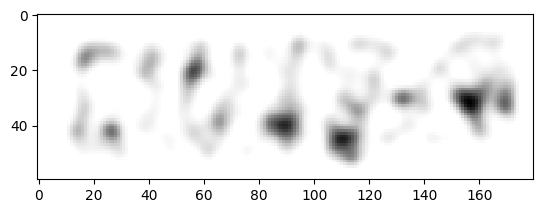

In [20]:
plt.imshow(X_gauss, interpolation='nearest', cmap='Greys')

In [21]:
X_gauss

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

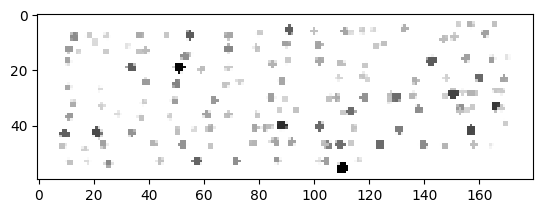

In [22]:
plt.imshow(X_scatter, interpolation='nearest', cmap='Greys')

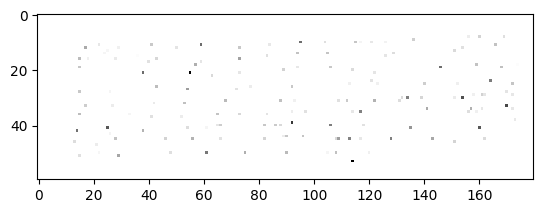

In [114]:
plt.imshow(X_dot, interpolation='nearest', cmap='Greys')

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

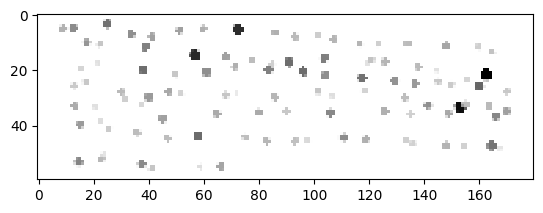

In [30]:
Xs, y, demo = heatdata.load_scatter(['ru'], '../Data/scatter')
plt.imshow(Xs[0, :, :], interpolation='nearest', cmap='Greys')
Xs[0, :, :]